<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/precipita%C3%A7%C3%A3o_e_rosa_dos_ventos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de bioquimica
esse código tem como objetivo fazer os gráficos do relatório de bioqúimica usando os dados coletados no campo do dia 12/09/2024

In [ ]:
!pip install netCDF4

abrir csv

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import pandas as pd
from matplotlib import cm
from matplotlib.colors import Normalize

In [ ]:
fn = '/content/dadometorologico.csv'
df = pd.read_csv(fn)

In [ ]:
data = df.iloc[8:]
data = data.iloc[:-8]
label = data.iloc[0]
data = data[1:]
data.columns = label
display(data)


8,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
9,2024/09/05,0000 UTC,0,"1015,9","1015,9","1015,1",NaN,"20,7","17,8",21,"20,6","17,9","17,2",83,80,83,123,4,"1,8"
10,2024/09/05,0100 UTC,0,"1017,4","1017,4","1015,8",NaN,"19,5","17,2","20,7","19,5","17,8","17,2",87,83,87,146,8,"3,8"
11,2024/09/05,0200 UTC,0,"1017,5","1017,8","1017,1",NaN,"19,4","15,9","19,4","19,1","17,2","15,8",87,80,80,160,"8,1","2,7"
12,2024/09/05,0300 UTC,0,"1017,3","1017,8","1017,3",NaN,"19,6","15,1","19,6","19,2","15,9","14,9",80,75,76,163,"6,8","1,4"
13,2024/09/05,0400 UTC,0,"1016,5","1017,5","1015,9",NaN,"18,5","15,1","19,7","18,5","15,2","14,7",81,74,81,152,"9,7","4,9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2024/09/12,1100 UTC,0,"1012,9","1012,9","1012,6","326,8","19,1","17,7","19,1","18,3","17,7","17,2",93,92,92,284,"1,9","0,8"
189,2024/09/12,1200 UTC,0,"1012,9","1013,1","1012,8","942,1","20,6","17,8","20,6","19,1","18,3","17,7",92,84,84,18,"3,4","1,4"
190,2024/09/12,1300 UTC,0,"1012,8",1013,"1012,8","1567,8","20,9",18,"21,3","20,5","18,2","17,6",84,81,83,357,4,"2,2"
191,2024/09/12,1400 UTC,0,"1013,1","1013,1","1012,7","1914,3","22,6","18,5","22,6","20,8","18,6","17,9",85,77,78,112,"4,2","0,8"


## Criar rosa dos ventos

Recortar dados para apenas no dia do campo

In [ ]:
#data = data.iloc[168:184]
#display(data)

In [ ]:
direcao = pd.to_numeric(data['VENTO, DIREÇÃO HORARIA (gr) (° (gr))'], errors='coerce')
velocidade = pd.to_numeric(data['VENTO, VELOCIDADE HORARIA (m/s)'], errors='coerce')
direcao = direcao.fillna(0)
velocidade = velocidade.fillna(0)

Determinar os ângulos e espaçamentos

In [ ]:
bins = np.arange(0, 360, 30)
hist, bin_edges = np.histogram(direcao, bins=bins, weights=velocidade)

converção para radianos para gráfico polar

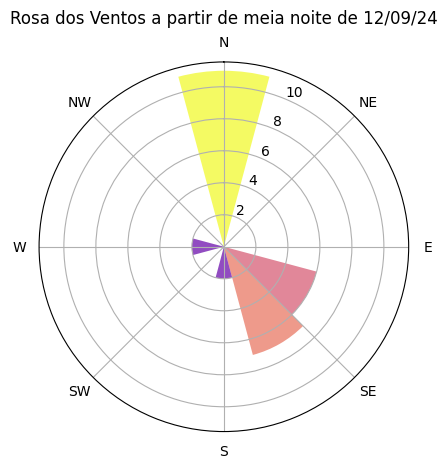

In [ ]:
cmap = cm.get_cmap('plasma')
norm = Normalize(vmin=min(hist), vmax=max(hist))
colors = cmap(norm(hist))
angles = np.deg2rad(bin_edges[:-1])
width = np.deg2rad(30)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hist, width=width, color=colors, alpha=0.7)
ax.set_xticks(np.deg2rad(np.arange(0, 360, 45)))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Rosa dos Ventos a partir de meia noite de 12/09/24", va='bottom')
plt.show()

## Criar gráfico de linha com precipitação e temperatura durante a semana

In [ ]:
T1 = pd.to_numeric(data['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].str.replace(',', '.'), errors='coerce')
T2 = pd.to_numeric(data['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'].str.replace(',', '.'), errors='coerce')
tmedio = (T1 + T2) / 2

Acm_chuva_d = pd.to_numeric(data['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], errors='coerce')
Acm_chuva_d = Acm_chuva_d.fillna(0)

dia = pd.to_datetime(data['Data'], errors='coerce').dt.date
dados = pd.DataFrame({'dia': dia, 'tmedio': tmedio, 'Acm_chuva_d': Acm_chuva_d})
t2medio= dados.groupby('dia')['tmedio'].mean()
Acm_chuva_d = dados.groupby('dia')['Acm_chuva_d'].sum()
dia = dados['dia'].unique()
dados = pd.DataFrame({'dia': dia, 't2medio': t2medio, 'Acm_chuva_d': Acm_chuva_d})

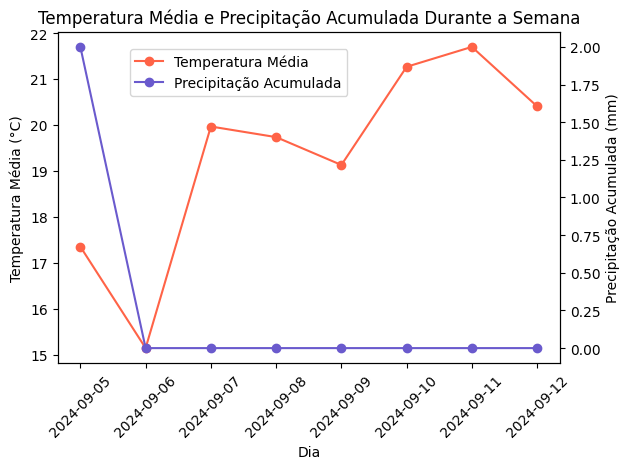

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia')
ax1.set_ylabel('Temperatura Média (°C)', color='k')
ax1.plot(dados.dia, t2medio, color='tomato', marker='o', label='Temperatura Média')
ax1.tick_params(axis='y', labelcolor='k')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('Precipitação Acumulada (mm)', color='k')
ax2.plot(dados.dia, dados.Acm_chuva_d, color='slateblue', marker='o', label='Precipitação Acumulada')
ax2.tick_params(axis='y', labelcolor='k')

plt.title('Temperatura Média e Precipitação Acumulada Durante a Semana')
fig.legend(loc="upper left", bbox_to_anchor=(0.2, 0.9))
plt.tight_layout()
plt.show()